# Data Wrangling
## import work

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import *

In [85]:
df = pd.DataFrame(pd.read_csv('hour1.csv'))
df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,7/3/2011,3,0,7,17,0,0,0,3,0.80,0.7424,0.49,0.8507,181,177,358
1,2,7/3/2011,3,0,7,18,0,0,0,3,0.80,0.7424,0.49,0.8507,74,107,181
2,3,8/27/2011,3,0,8,17,0,6,0,3,0.64,0.5758,0.89,0.8358,2,14,16
3,4,2/25/2011,1,0,2,15,0,5,1,1,0.46,0.4545,0.41,0.8060,5,50,55
4,5,2/24/2012,1,1,2,21,0,5,1,1,0.42,0.4242,0.35,0.8060,1,151,152


In [86]:
df.nunique()

instant       17379
dateday         731
season            4
year              2
month            12
hour             24
holiday           2
weekday           7
workingday        2
weather           4
temp             50
atemp            65
humidity         89
windspeed        30
casual          322
registered      776
count           869
dtype: int64

In [87]:
display(df.loc[[]])

df.columns

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


Index(['instant', 'dateday', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weather', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [88]:
df.isna().sum()

instant       0
dateday       0
season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [89]:
df.duplicated().sum()

0

In [90]:
df['dateday'].head()

0     7/3/2011
1     7/3/2011
2    8/27/2011
3    2/25/2011
4    2/24/2012
Name: dateday, dtype: object

In [100]:
df['dateday'] = pd.to_datetime(df['dateday'], format='%m/%d/%Y')
day = df.insert(loc=5, column='day', value=df['dateday'].dt.day)


ValueError: cannot insert day, already exists

In [92]:
#df.nlargest(5, 'count') 
df.nsmallest(5, 'count')

,instant,dateday,season,year,month,day,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
8,9,2012-02-12,1,1,2,12,4,0,0,0,2,0.10,0.0455,0.46,0.7164,0,1,1
71,72,2011-03-07,1,0,3,7,3,0,1,1,1,0.20,0.1515,0.80,0.5821,0,1,1
114,115,2011-02-20,1,0,2,20,4,0,0,0,1,0.22,0.1818,0.44,0.5522,0,1,1
155,156,2011-02-15,1,0,2,15,4,0,2,1,1,0.22,0.1818,0.37,0.5224,0,1,1
160,161,2011-03-07,1,0,3,7,4,0,1,1,1,0.20,0.1515,0.80,0.5224,1,0,1


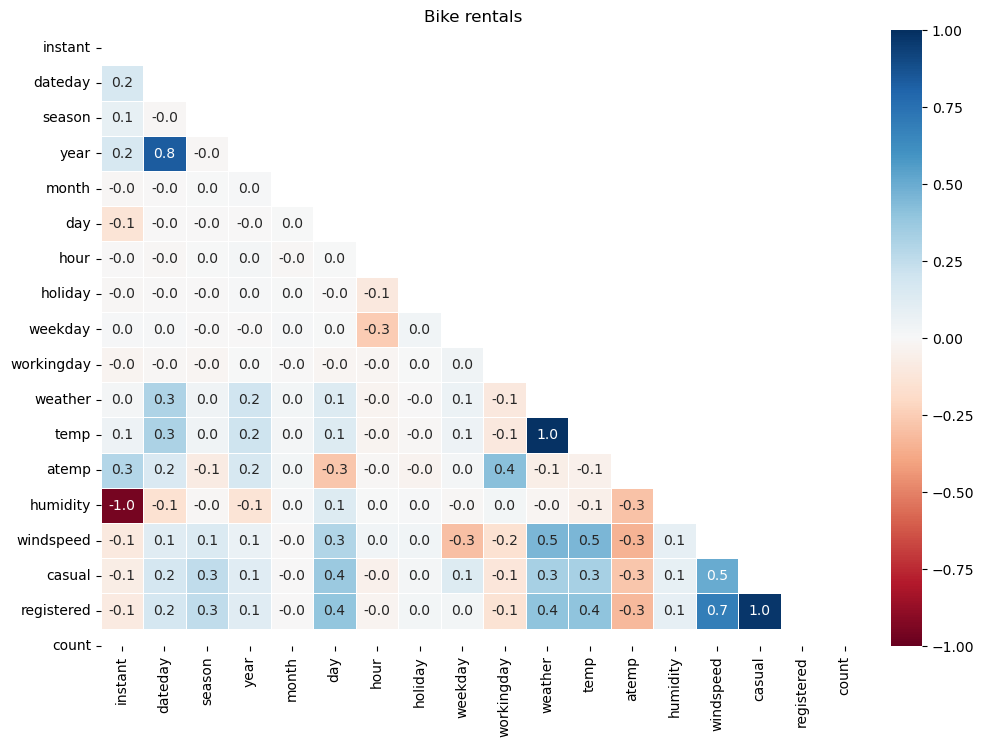

In [93]:
plt.figure(figsize=(12,8))

#giving the data 
corr = df.corr()

#giving the color
colormap = sns.color_palette("RdBu", 6)

#giving new list 

x = df.columns
y = df.columns

xcat = x
ycat = y

#creating the mask to remove the top triangle
mask = np.triu(corr)

#creating the chart
sns.heatmap(corr, 
            annot=True, 
            cmap="RdBu", 
            vmin= -1, vmax= 1, 
            fmt= '.1f',
            xticklabels= xcat, yticklabels= ycat,
            mask=mask,
            linewidths= 0.5,
            linecolor= 'white')
plt.title('Bike rentals')

plt.show()

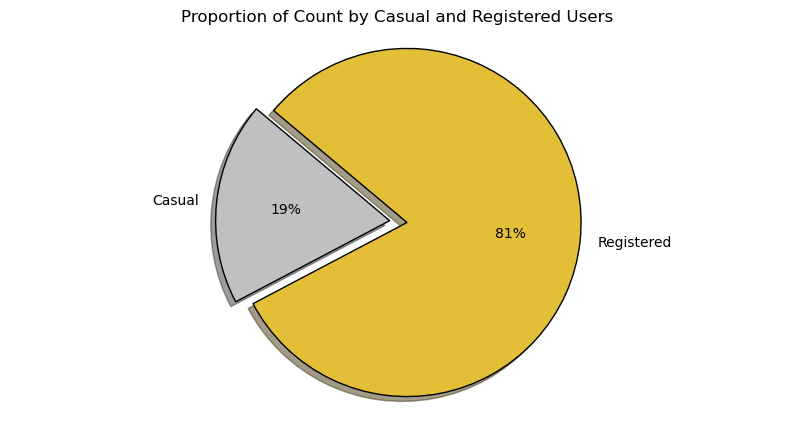

In [94]:
fig, axs = plt.subplots(figsize=(10, 5))

labels = ['Casual', 'Registered']
sizes = [df['casual'].sum(), df['registered'].sum()]
colors = ['silver', '#e2bf36']
explode = (0, 0.1) 

plt.pie(sizes, 
        # explode=explode, 
        labels=labels, 
        autopct='%1.0f%%',
        shadow=True, 
        colors=colors,
        explode=explode,
        startangle=140,
        wedgeprops={'edgecolor': 'black'})
plt.axis('equal')
plt.title('Proportion of Count by Casual and Registered Users')
plt.show()

In [95]:
# Create separate data frames for year 0 and year 1
df_year0 = df[df['year'] == 0]
df_year1 = df[df['year'] == 1]

# Get the average count for each year
avg_count_year0 = df_year0['count'].mean()
avg_count_year1 = df_year1['count'].mean()

# Print the average count for each year
print('Average count for year 0:', avg_count_year0)
print('Average count for year 1:', avg_count_year1)

Average count for year 0: 143.79444765760556
Average count for year 1: 234.6663613464621


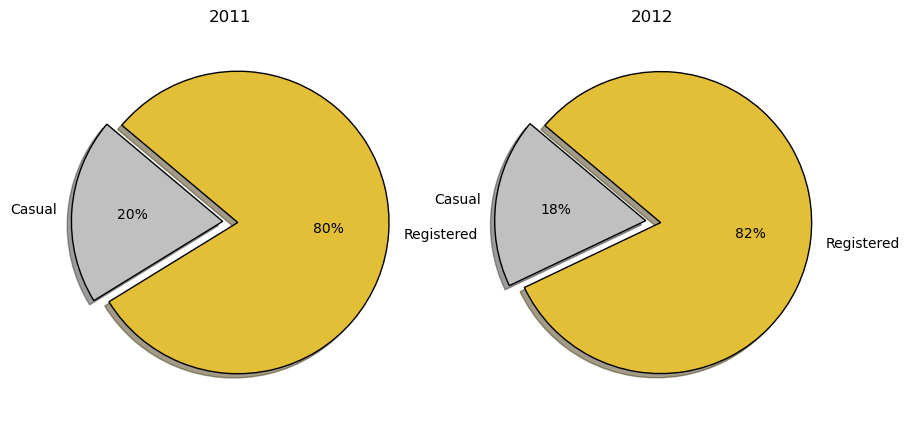

In [96]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
df_year0 = df[df['year'] == 0]
df_year1 = df[df['year'] == 1]

# Year 0
labels = ['Casual', 'Registered']
sizes = [df_year0['casual'].sum(), df_year0['registered'].sum()]
colors = ['#C0C0C0', '#e2bf36']
explode = (0.0, 0.1) 

axs[0].pie(sizes, 
           explode=explode, 
           labels=labels, 
           autopct='%1.0f%%',
           shadow=True, 
           colors=colors,
           startangle=140,
           wedgeprops={'edgecolor': 'black'})
axs[0].set_title('2011')
axs[0].axis('equal')

# Year 1
labels = ['Casual', 'Registered']
sizes = [df_year1['casual'].sum(), df_year1['registered'].sum()]
explode = (0.0, 0.1) 

axs[1].pie(sizes, 
           explode=explode, 
           labels=labels, 
           autopct='%1.0f%%',
           shadow=True, 
           colors=colors,
           startangle=140,
           wedgeprops={'edgecolor': 'black'})
axs[1].set_title('2012')
axs[1].axis('equal')

plt.show()

The column you selected: day


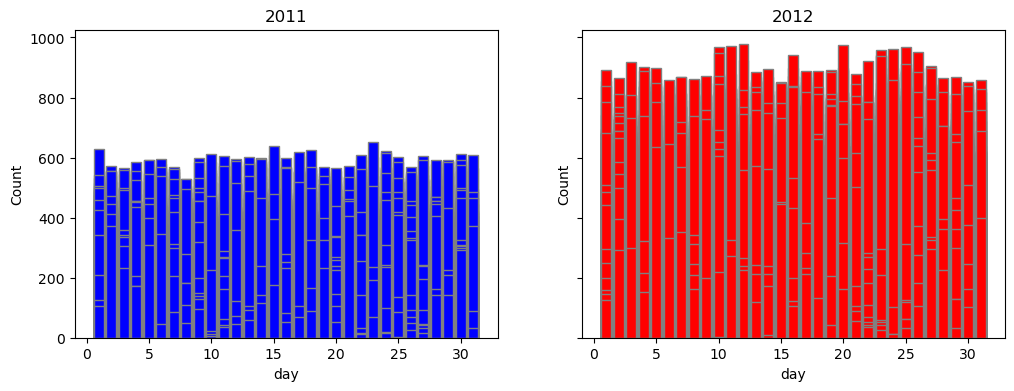

In [97]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(12, 4))

#imput
detail_input = input('Select: casual, registered, day, year, month, hour, holiday, weekday, workingday, weather')
print(f'The column you selected: {detail_input}')

# Year 0
df_year0 = df[df['year'] == 0]
df_year1 = df[df['year'] == 1]

x = df_year0[detail_input]
y = df_year0['count']

axs[0].bar(x, y, color= 'Blue', edgecolor='grey')
axs[0].set_title('2011')
axs[0].set_xlabel(detail_input)
axs[0].set_ylabel('Count')

# Year 1
x = df_year1[detail_input]
y = df_year1['count']

axs[1].bar(x, y, color = 'Red', edgecolor='grey')
axs[1].set_title('2012')
axs[1].set_xlabel(detail_input)
axs[1].set_ylabel('Count')

plt.show()

The column you selected: day


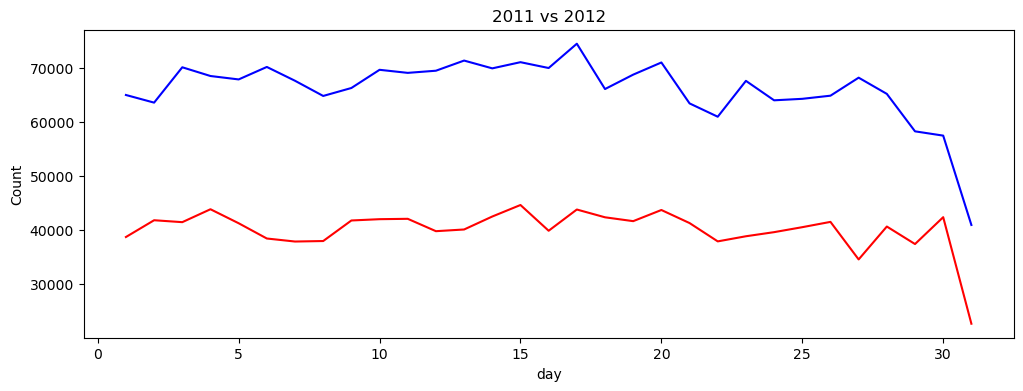

In [98]:
fig, axs = plt.subplots(1, sharey=True, figsize=(12, 4))


wanted_input = input('Select: casual, registered, day, year, month, hour, holiday, weekday, workingday, weather')
print(f'The column you selected: {wanted_input}')

for idx, c in enumerate(['red', 'blue']):

    x = []
    y = []

    for h in df[df['year'] == idx].groupby(wanted_input):
        x.append(h[0])
        y.append(h[1]['count'].sum())

    axs.plot(x, y, color= c)
    axs.set_title('2011 vs 2012')
    axs.set_xlabel(wanted_input)
    axs.set_ylabel('Count')


plt.show()

In [99]:
df[df['year'] == 0].head()

,instant,dateday,season,year,month,day,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-07-03,3,0,7,3,17,0,0,0,3,0.80,0.7424,0.49,0.8507,181,177,358
1,2,2011-07-03,3,0,7,3,18,0,0,0,3,0.80,0.7424,0.49,0.8507,74,107,181
2,3,2011-08-27,3,0,8,27,17,0,6,0,3,0.64,0.5758,0.89,0.8358,2,14,16
3,4,2011-02-25,1,0,2,25,15,0,5,1,1,0.46,0.4545,0.41,0.8060,5,50,55
5,6,2011-02-15,1,0,2,15,1,0,2,1,1,0.30,0.2424,0.42,0.7761,0,5,5
